In [23]:
import wordgraph as wg
import pandas as pd
import os
import networkx as nx 

from ggplot import *
%matplotlib inline

In [3]:
# pull all clustering ceofficients from graphs in a range

def get_clustering(dir_path, out_name):
    df = pd.DataFrame(columns=['epsilon', 'cluster_coeff'])
    results = []
    with open(out_name, 'a') as output:
        output.write("epsilon,cluster_coeff\n")
        for root, dirs, files in os.walk(dir_path):
            for file in files:
                if not file.startswith("."):
                    G = wg.WordGraph()
                    G.load_pickle(os.path.join(root, file))
                    clstr = G.average_clustering()
                    entry = pd.DataFrame([[G.epsilon, clstr]], columns=['epsilon', 'cluster_coeff'])
                    entry.to_csv(output, header=False, index=False)
                    df = df.append(entry, ignore_index=True)
                
    return df

## Get Clustering Coefficients for all the Graphs

### SEEDLings

#### 6 Month

In [3]:
cluster_range = get_clustering('/Volumes/Lexar/semspace_output/seedlings_6mo_no_CHI',
                              out_name="output/seedlings_6mo_clustering.csv")

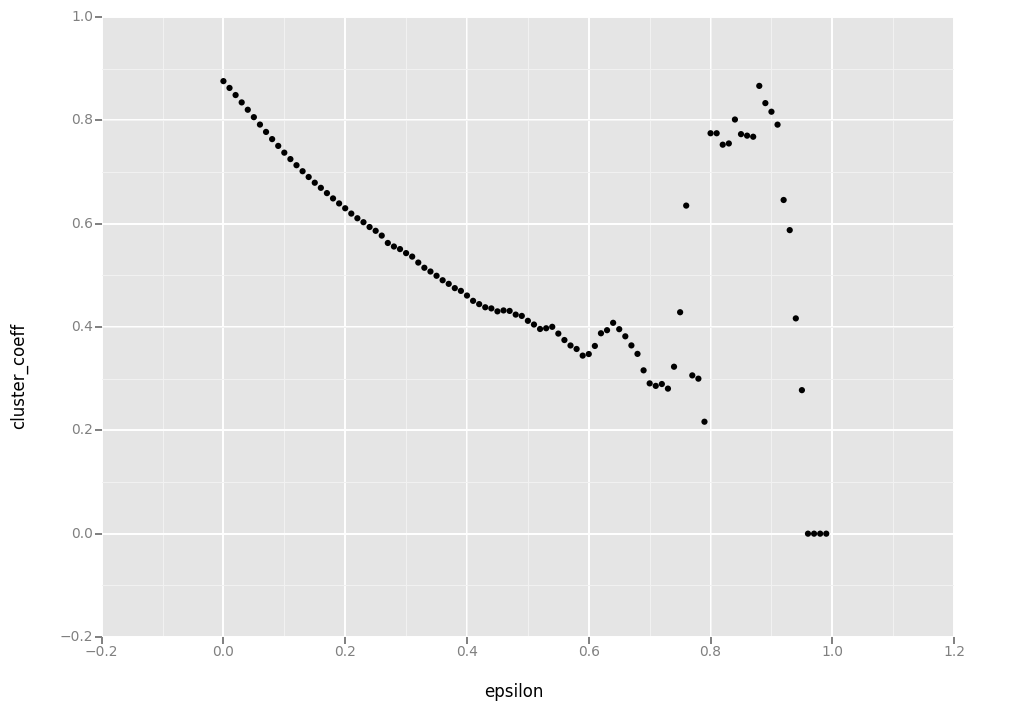

<ggplot: (-9223372036571813856)>

In [4]:
ggplot(cluster_range, aes(x='epsilon', y='cluster_coeff'))+\
    geom_point()

#### 16 + 17 Month

In [6]:
cluster_range = get_clustering('/Volumes/Lexar/semspace_output/seedlings_1617mo_no_CHI',
                              out_name='output/seedlings_1617mo_clustering.csv')


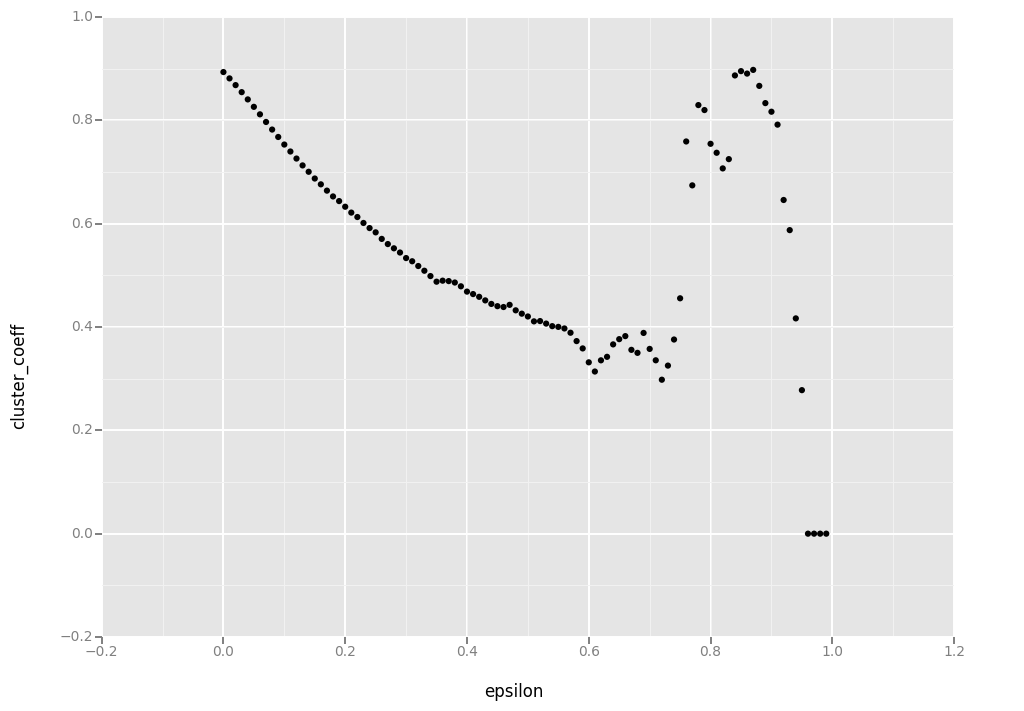

<ggplot: (-9223372036532474494)>

In [7]:
ggplot(cluster_range, aes(x='epsilon', y='cluster_coeff'))+\
    geom_point()

#### All

In [11]:
cluster_range = get_clustering('/Volumes/Lexar/semspace_output/seedlings_all_no_CHI',
                              out_name='output/seedlings_all_clustering.csv')

KeyboardInterrupt: 

In [ ]:
ggplot(cluster_range, aes(x='epsilon', y='cluster_coeff'))+\
    geom_point()

### WordBank

In [23]:
cluster_range = get_clustering('/Volumes/Lexar/semspace_output/wordbank',
                              out_name='output/wordbank_clustering.csv')

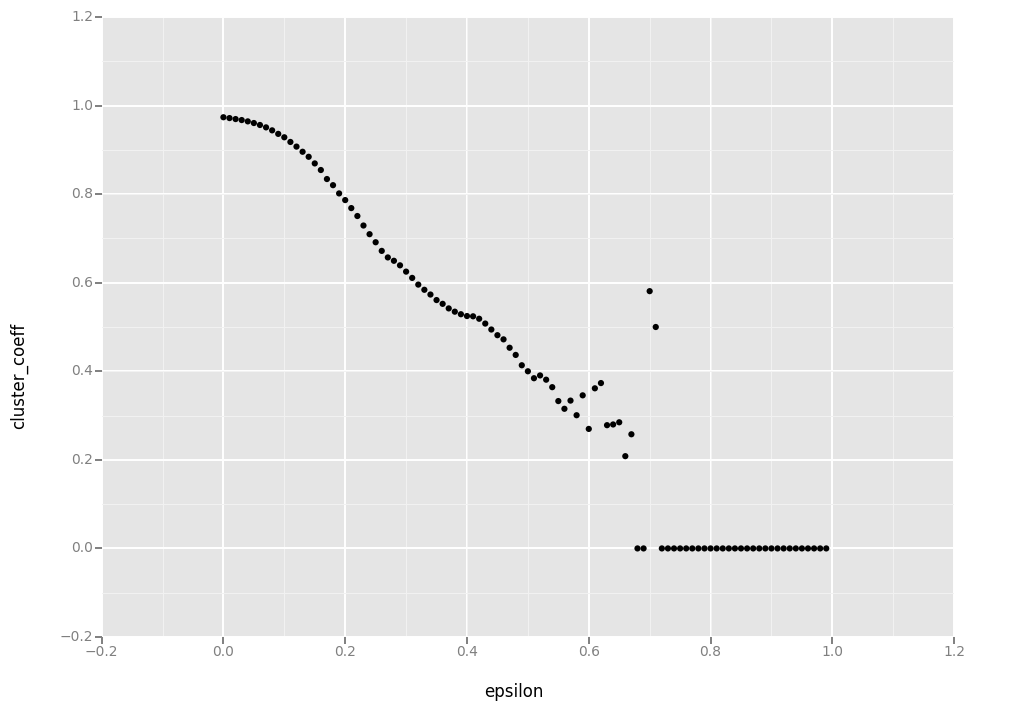

<ggplot: (-9223372036573847969)>

In [24]:
ggplot(cluster_range, aes(x='epsilon', y='cluster_coeff'))+\
    geom_point()

In [4]:
G = wg.WordGraph()
G.load_pickle('/Volumes/Lexar/semspace_output/seedlings_all/cos_0.13')

In [5]:
g_clustr = G.average_clustering()

In [6]:
g_length = G.average_shortest_path()

In [9]:
g_clustr

0.5940565556351189

In [10]:
g_length

1.7493506088903774

In [7]:
# G = nx.erdos_renyi_graph(6404, 0.1)
G = nx.erdos_renyi_graph(6404, 0.1)

In [8]:
nx.average_clustering(G)

0.10006486344694175

In [9]:
nx.average_shortest_path_length(G)

1.8999449137823141

In [ ]:
lattice = nx.grid_2d_graph(m=80, n=80)

In [10]:
WS = nx.watts_strogatz_graph(n=6404, k=640, p=0.1)

In [11]:
nx.average_clustering(WS)

0.5567252393949877

In [12]:
nx.average_shortest_path_length(WS)

1.900047877307668

In [30]:
lattice = nx.grid_2d_graph(m=100, n=100)

In [31]:
nx.average_clustering(lattice)

0.0

In [32]:
nx.average_shortest_path_length(lattice)

66.66666666666667

In [43]:
grid = nx.grid_graph([6,6])

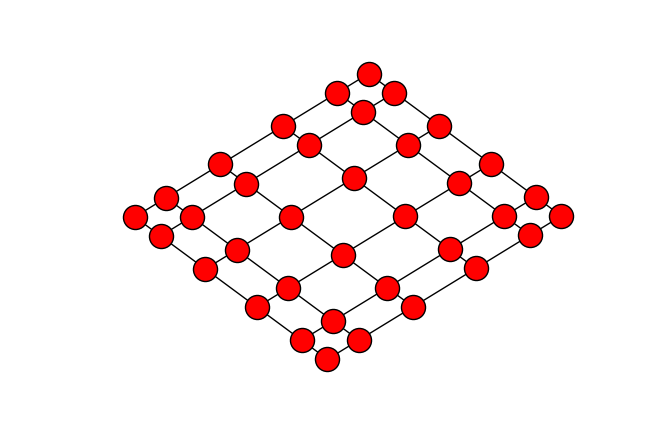

In [44]:
nx.draw_spectral(grid)

In [45]:
nx.average_clustering(grid)

0.0

In [59]:
ring = nx.watts_strogatz_graph(n=24, k=6, p=0)

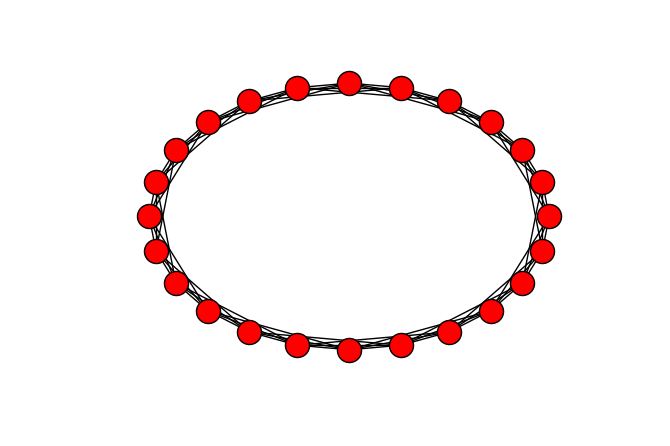

In [60]:
nx.draw_circular(ring)

In [61]:
nx.average_clustering(ring)

0.5999999999999998

In [76]:
WS = nx.watts_strogatz_graph(n=6404, k=640, p=0.05)

In [77]:
nx.average_clustering(WS)

0.6466863458608448

In [78]:
nx.average_shortest_path_length(WS)

1.9008109584797024

In [80]:
ER = nx.erdos_renyi_graph(n=6404, p=0.05)

In [81]:
nx.average_clustering(ER)

0.04995730350698908

In [82]:
nx.average_shortest_path_length(ER)

1.9500309866071328